In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras

In [4]:
data_dir = './train'


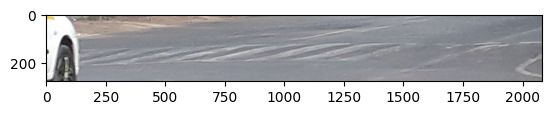

In [5]:
import cv2
example=cv2.imread('./train/Humps/1001.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
plt.imshow(example)

In [6]:
example.shape

(278, 2082, 3)

In [7]:

from tensorflow.keras.utils import image_dataset_from_directory
#train_data=image_dataset_from_directory(data_dir)
image_height = 256
batch_size=32
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 441 files belonging to 2 classes.
Using 353 files for training.


In [8]:
class_names = train_ds.class_names
print(class_names)
len(class_names)

['Humps', 'No Humps']


2

In [9]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 441 files belonging to 2 classes.
Using 88 files for validation.


In [11]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [12]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24,644,495
Trainable params: 1,056,783
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,  
  epochs=epochs
)

Epoch 1/10
12/12 [==============================] - 50s 3s/step - loss: 0.2547 - accuracy: 0.9093 - val_loss: 1.3319e-05 - val_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 38s 3s/step - loss: 4.3190e-06 - accuracy: 1.0000 - val_loss: 1.8897e-06 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 40s 3s/step - loss: 8.4863e-07 - accuracy: 1.0000 - val_loss: 1.0485e-06 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 38s 3s/step - loss: 5.0250e-07 - accuracy: 1.0000 - val_loss: 8.9541e-07 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 43s 4s/step - loss: 4.1098e-07 - accuracy: 1.0000 - val_loss: 8.6426e-07 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 40s 3s/step - loss: 3.7890e-07 - accuracy: 1.0000 - val_loss: 8.6290e-07 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 42s 3s/step - loss: 3.5864e-07 - accuracy: 1.0000 - val_loss: 8.

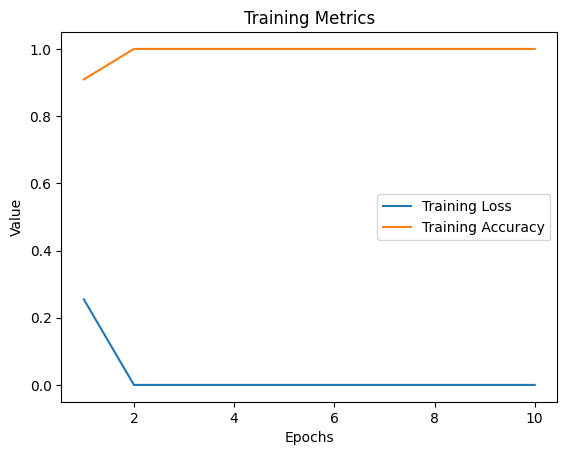

In [15]:
resnet_model.save('speedbreaker.h5')
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

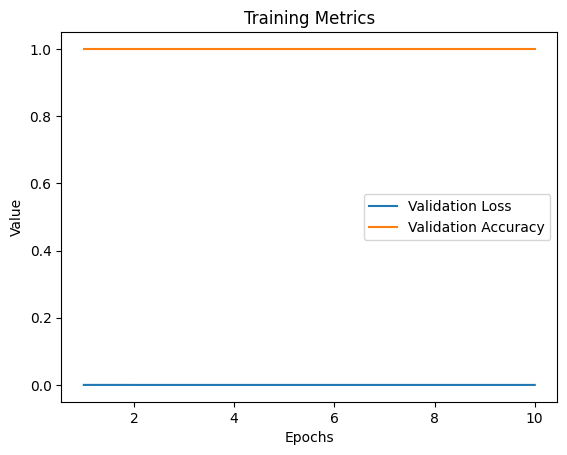

In [16]:
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()
